# Import API

In [38]:
import pandas as pd
import opendatasets as od
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Data Reference

https://www.kaggle.com/datasets/pantanjali/unemployment-dataset

# Importing Data

**Download data from opendatasets API**

In [6]:
od.download("https://www.kaggle.com/datasets/pantanjali/unemployment-dataset")

Skipping, found downloaded files in "./unemployment-dataset" (use force=True to force download)


**Import CSV into Pandas Data Frame**

In [2]:
dt = pd.read_csv("./unemployment-dataset/unemployment analysis.csv")

# Analysing Data

In [3]:
##replace missing values with 0
dt = dt.fillna(0)

In [4]:
##wide to long
dt = pd.wide_to_long(dt,stubnames="",i=["Country Name","Country Code"],j="year")
##reset index
dt = dt.reset_index()

In [5]:
##rename
dt = dt.rename(columns={"":"unemployment_rate"})

In [6]:
##group By country code and country name, then sort by average unemployment rate
dt_gb = dt.groupby(["Country Code","Country Name"]).aggregate({"unemployment_rate":"mean"}).reset_index()
dt_gb = dt_gb.sort_values(by=["unemployment_rate"],ascending=False)

In [7]:
##slicing: choose top 10 unemployment rate
dt10 = dt_gb.iloc[0:10,]

In [8]:
##merge: combine average unemployment rate with yearly rates for 10 countries
dt_merge = dt10.merge(dt,how="left",on = ["Country Code","Country Name"])

In [9]:
dt_merge = dt_merge.rename(columns={"unemployment_rate_x":"unemployment_rate_average","unemployment_rate_y":"unemployment_rate_year"})


## plots

In [10]:
dt_merge_use = dt_merge[["Country Name","unemployment_rate_average","year","unemployment_rate_year"]]


In [11]:
dt_merge_use

,Country Name,unemployment_rate_average,year,unemployment_rate_year
0,Lesotho,30.396452,1991,36.12
1,Lesotho,30.396452,1992,36.39
2,Lesotho,30.396452,1993,36.74
3,Lesotho,30.396452,1994,36.98
4,Lesotho,30.396452,1995,37.34
...,...,...,...,...
305,Botswana,19.814839,2017,21.57
306,Botswana,19.814839,2018,22.07
307,Botswana,19.814839,2019,22.61
308,Botswana,19.814839,2020,24.93


In [12]:
cnames = list(pd.unique(dt_merge_use["Country Name"]))

In [13]:
def drawPlotACountry_year_trend(data_frame,country_name):
    use_dt = data_frame[data_frame["Country Name"]==country_name]
    plt.plot(use_dt["year"],use_dt["unemployment_rate_year"])
    plt.title(country_name)
    return plt.show()

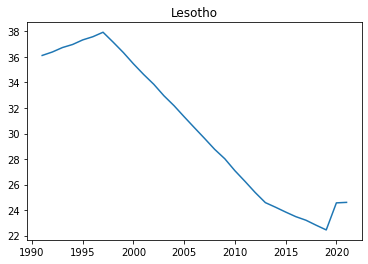

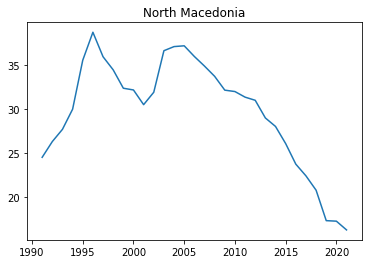

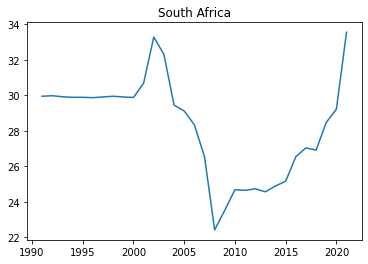

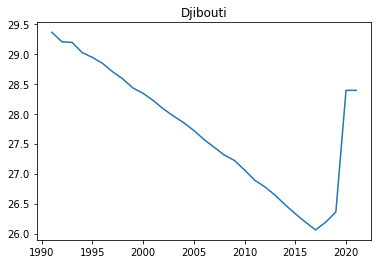

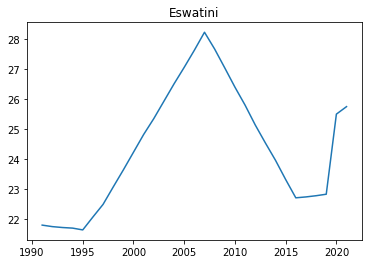

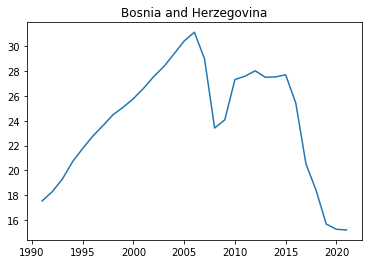

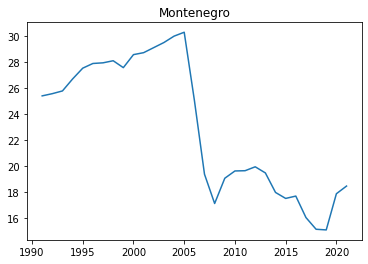

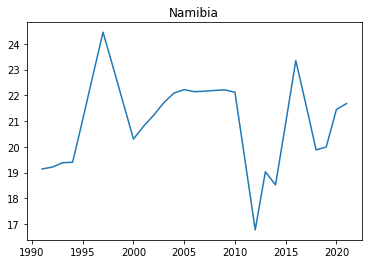

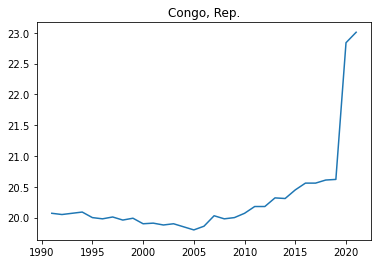

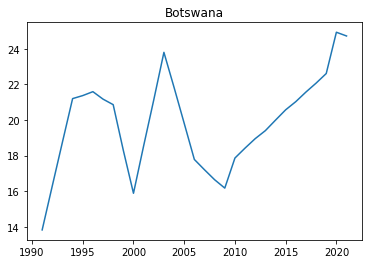

In [14]:
for c in cnames:
    drawPlotACountry_year_trend(dt_merge_use,c)

Text(0.5, 1.0, 'United States')

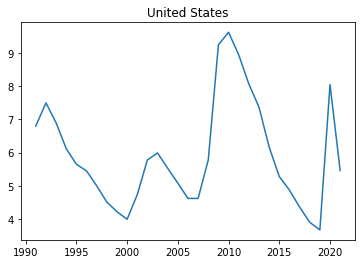

In [15]:
use_dt_USA = dt[dt["Country Name"]=='United States']
plt.plot(use_dt_USA["year"],use_dt_USA["unemployment_rate"])
plt.title("United States")

## Tail 10 unemployment

In [19]:
dttail10 = dt_gb.sort_values(by=["unemployment_rate"]).iloc[0:10,]

In [21]:
dt_merge_tail = dttail10.merge(dt,how="left",on = ["Country Code","Country Name"])

In [22]:
dt_merge_tail = dt_merge_tail.rename(columns={"unemployment_rate_x":"unemployment_rate_average","unemployment_rate_y":"unemployment_rate_year"})


In [23]:
dt_merge_tail

,Country Code,Country Name,unemployment_rate_average,year,unemployment_rate_year
0,QAT,Qatar,0.569355,1991,0.81
1,QAT,Qatar,0.569355,1992,0.81
2,QAT,Qatar,0.569355,1993,0.81
3,QAT,Qatar,0.569355,1994,0.82
4,QAT,Qatar,0.569355,1995,0.82
...,...,...,...,...,...
305,NER,Niger,1.376452,2017,0.54
306,NER,Niger,1.376452,2018,0.55
307,NER,Niger,1.376452,2019,0.55
308,NER,Niger,1.376452,2020,0.62


In [24]:
dt_merge_use_tail = dt_merge_tail[["Country Name","unemployment_rate_average","year","unemployment_rate_year"]]


In [26]:
cnames_tail = list(pd.unique(dt_merge_use_tail["Country Name"]))

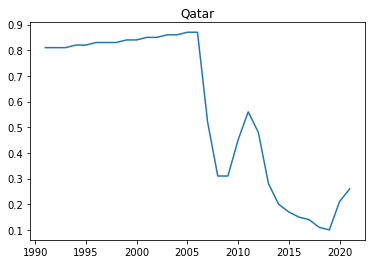

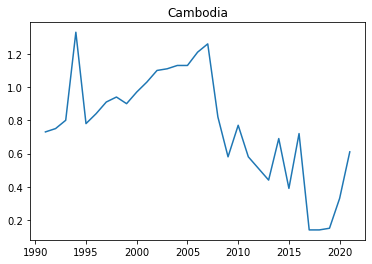

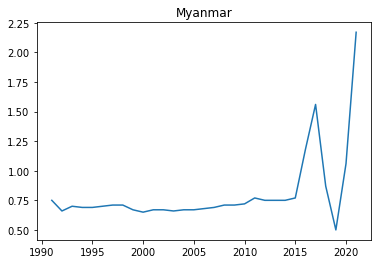

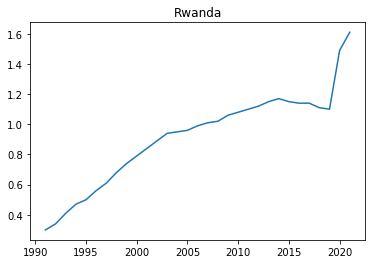

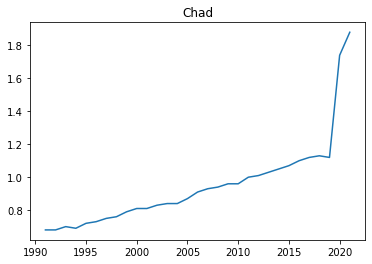

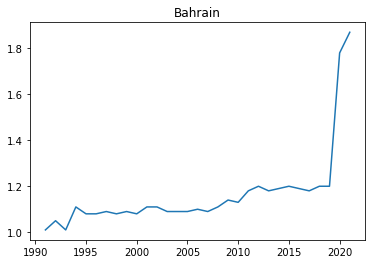

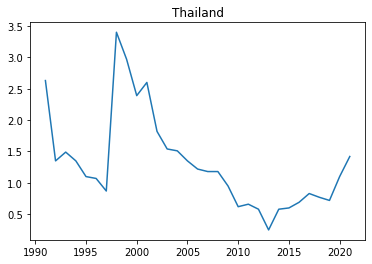

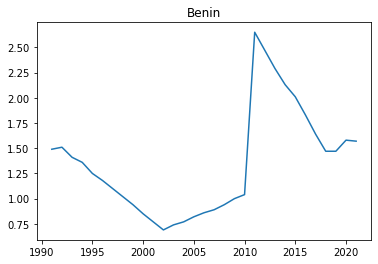

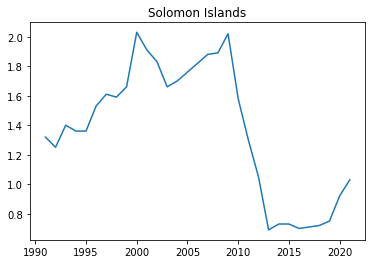

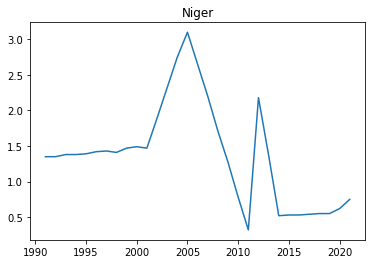

In [27]:
for c in cnames_tail:
    drawPlotACountry_year_trend(dt_merge_use_tail,c)

## number of years and countries

In [33]:
##number of countries
len(pd.unique(dt["Country Name"]))

235

In [35]:
##number of years
len(pd.unique(dt["year"]))

31

In [40]:
dt_gb

,Country Code,Country Name,unemployment_rate
123,LSO,Lesotho,30.396452
136,MKD,North Macedonia,29.789677
232,ZAF,South Africa,28.232581
49,DJI,Djibouti,27.733226
199,SWZ,Eswatini,24.391290
...,...,...,...
201,TCD,Chad,0.950000
179,RWA,Rwanda,0.916774
139,MMR,Myanmar,0.803548
108,KHM,Cambodia,0.767419


<AxesSubplot: >

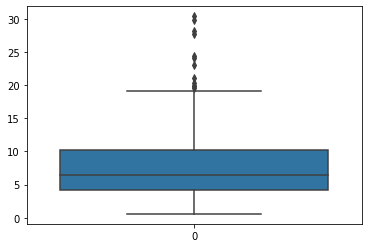

In [41]:
##seaborn:boxplot for average unemployment rate
sb.boxplot(dt_gb.unemployment_rate)